# Bài tập Naive Bayes

## Sử dụng GaussianNB để phân nhóm cho tập Titanic dataset
- dataset: 'Titanic_train.csv', 'Titanic_test.csv'


In [171]:
import pandas as pd
import matplotlib.pyplot as plt

In [172]:
df_train = pd.read_csv('Titanic_train.csv')
df_test = pd.read_csv('Titanic_test.csv')
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [173]:
# Inspect the dataset
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [174]:
df_train['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

Text(0, 0.5, '')

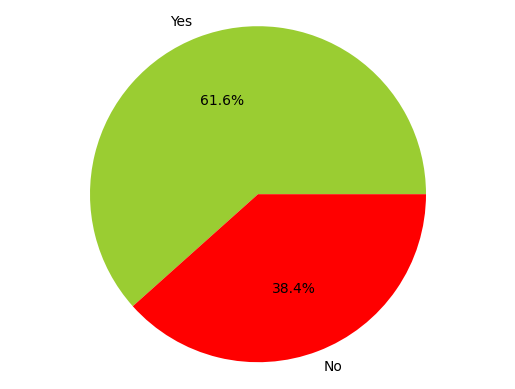

In [175]:
fig, ax = plt.subplots(1, 1)
ax.pie(df_train['Survived'].value_counts(),autopct='%1.1f%%', labels=['Yes','No'], colors=['yellowgreen','r'])
plt.axis('equal')
plt.ylabel('')

In [176]:
# remove passengerid, name, ticket, cabin, parch, sibsp,embarked
df_train = df_train.drop(['PassengerId','Name','Ticket','Cabin','Parch','SibSp','Embarked'], axis='columns')
df_test = df_test.drop(['PassengerId','Name','Ticket','Cabin','Parch','SibSp','Embarked'], axis='columns')
df_train

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500
...,...,...,...,...,...
886,0,2,male,27.0,13.0000
887,1,1,female,19.0,30.0000
888,0,3,female,NaN,23.4500
889,1,1,male,26.0,30.0000


In [177]:
# in the age column, remove the rows with missing values
df_train.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
Fare          0
dtype: int64

In [178]:
df_train = df_train.dropna(axis=0)
df_test = df_test.dropna(axis=0)
df_train


,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500
...,...,...,...,...,...
885,0,3,female,39.0,29.1250
886,0,2,male,27.0,13.0000
887,1,1,female,19.0,30.0000
889,1,1,male,26.0,30.0000


In [179]:
# replace sex column with numerical values
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
sex_train_encoded = le.fit_transform(df_train['Sex'])
sex_test_encoded = le.fit_transform(df_test['Sex'])
df_train.loc[:,'Sex'] = sex_train_encoded.astype('int32')
df_test.loc[:,'Sex'] = sex_test_encoded.astype('int32')
df_train


,Survived,Pclass,Sex,Age,Fare
0,0,3,1,22.0,7.2500
1,1,1,0,38.0,71.2833
2,1,3,0,26.0,7.9250
3,1,1,0,35.0,53.1000
4,0,3,1,35.0,8.0500
...,...,...,...,...,...
885,0,3,0,39.0,29.1250
886,0,2,1,27.0,13.0000
887,1,1,0,19.0,30.0000
889,1,1,1,26.0,30.0000


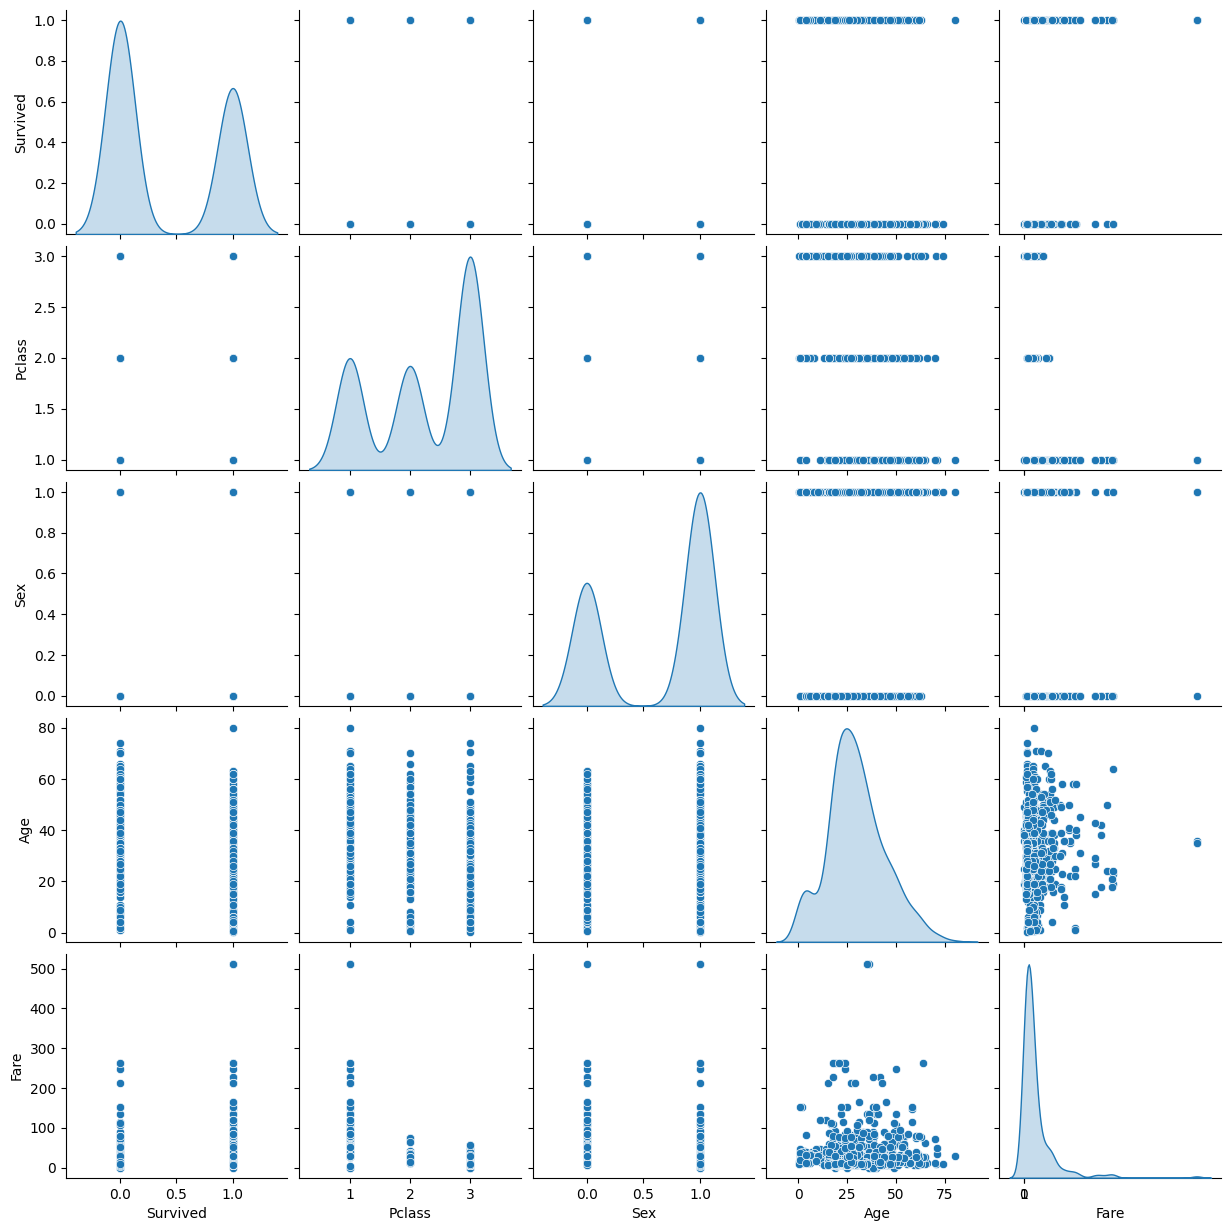

In [180]:
# visulize the data, plotting to see if there is gaussian distribution
import seaborn as sns

sns.pairplot(df_train, diag_kind='kde')
plt.xticks([0, 1])
plt.show()


In [181]:
# split the data into features and target
X_train = df_train.drop('Survived', axis='columns')
y_train = df_train['Survived']
df_test


,Pclass,Sex,Age,Fare
0,3,1,34.5,7.8292
1,3,0,47.0,7.0000
2,2,1,62.0,9.6875
3,3,1,27.0,8.6625
4,3,0,22.0,12.2875
...,...,...,...,...
409,3,0,3.0,13.7750
411,1,0,37.0,90.0000
412,3,0,28.0,7.7750
414,1,0,39.0,108.9000


In [182]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_train, y_train)
clf

GaussianNB()

In [183]:
# the result of the prediction from file Titanic_test.csv
y_pred = clf.predict(df_test)
y_pred

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,

In [184]:
y_pred_prob = clf.predict_proba(df_test)
y_pred_prob


array([[9.67416748e-01, 3.25832516e-02],
       [4.75814789e-01, 5.24185211e-01],
       [9.28643015e-01, 7.13569848e-02],
       [9.65092985e-01, 3.49070151e-02],
       [4.30914684e-01, 5.69085316e-01],
       [9.57848951e-01, 4.21510487e-02],
       [4.50275289e-01, 5.49724711e-01],
       [9.15493586e-01, 8.45064143e-02],
       [4.09725630e-01, 5.90274370e-01],
       [9.61952890e-01, 3.80471100e-02],
       [7.87372707e-01, 2.12627293e-01],
       [1.50712922e-02, 9.84928708e-01],
       [9.26413598e-01, 7.35864019e-02],
       [4.61305154e-02, 9.53869485e-01],
       [2.35578659e-01, 7.64421341e-01],
       [9.27011767e-01, 7.29882334e-02],
       [9.61910777e-01, 3.80892232e-02],
       [4.42362855e-01, 5.57637145e-01],
       [4.74943939e-01, 5.25056061e-01],
       [6.41510957e-01, 3.58489043e-01],
       [9.51534027e-01, 4.84659726e-02],
       [5.71416920e-01, 4.28583080e-01],
       [2.15860181e-12, 1.00000000e+00],
       [9.70235617e-01, 2.97643830e-02],
       [3.673738